In [36]:
#library
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


In [26]:
#dummy data
populations = 1000

x = np.random.uniform(low =-10,high=10,size=(populations,1))
y = np.random.uniform(-10,10,size=(populations,1))

In [27]:
x.shape,y.shape

((1000, 1), (1000, 1))

In [28]:
generated_inputs = np.column_stack((x,y))

In [29]:
generated_inputs.shape

(1000, 2)

In [30]:
noise = np.random.uniform(-1,1,(populations,1))
generated_targets = 2*x - 3*y + 5 +noise

In [31]:
generated_targets.shape

(1000, 1)

In [32]:
#saving into npz format
np.savez('Tf_first',inputs = generated_inputs, targets =generated_targets)

In [33]:
## Loading data
dummy_data = np.load('Tf_first.npz')

In [76]:
input_size = 2  #tow feature
output_size = 1 #1 target
initializer = tf.random_uniform_initializer(minval=-0.1, maxval= 0.1)


In [78]:
#creating a model
model = keras.Sequential([keras.layers.Dense(output_size,kernel_initializer=initializer, bias_initializer=initializer)])

In [91]:
#compile # optimization function #loss function
#custom optimizer
custom_optimzer = keras.optimizers.SGD(learning_rate=0.02)
#model
model.compile(optimizer=custom_optimzer, loss ='mean_squared_error',)

In [92]:
#fit the model
model.fit(dummy_data['inputs'],dummy_data['targets'],epochs=100,verbose=0) #if verbose = 2, we could see all of the loss result

In [93]:
#Weights and Bias

In [94]:
model.layers[0].get_weights()

[array([[ 2.0821724],
        [-2.9864051]], dtype=float32), array([5.0151687], dtype=float32)]

In [95]:
weights = model.layers[0].get_weights()[0]
bias = model.layers[0].get_weights()[1]

In [96]:
weights

array([[ 2.0821724],
       [-2.9864051]], dtype=float32)

In [97]:
bias

array([5.0151687], dtype=float32)

In [98]:
## Predictions
model.predict_on_batch(dummy_data['inputs'])[:5]

array([[ 30.967941],
       [ 25.81535 ],
       [-16.462267],
       [-15.218285],
       [ 31.063555]], dtype=float32)

In [99]:
dummy_data['targets'][:5]

array([[ 30.47455887],
       [ 26.03381168],
       [-17.28465194],
       [-15.30333695],
       [ 31.34071715]])

In [100]:
#Visulaize it

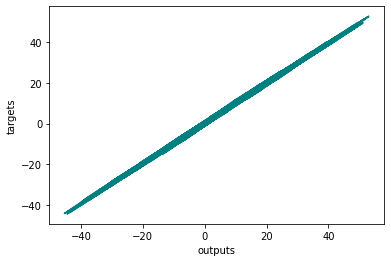

In [101]:
plt.plot(np.squeeze(model.predict_on_batch(dummy_data['inputs'])),(np.squeeze(dummy_data['targets'])),color='teal')

plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()